In [1]:
### Imports ###
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# from untracked logging files
data = [
    ["r", "phi_1", 1, 100, 4.2],
    ["r", "phi_1", 2, 100, 7.0],
    ["r", "phi_1", 3, 100, 9.4],
    ["r2", "phi_1", 1, 100, 4.8],
    ["r2", "phi_1", 2, 100, 8.4],
    ["r2", "phi_1", 3, 100, 12.7],
    ["rfr", "phi_1", 1, 100, 6.1],
    ["rfr", "phi_1", 2, 100, 8.5],
    ["rfr", "phi_1", 3, 100, 10.6],
    ["r^2 o f", "phi_1", 1, 100, 28.7],
    ["r^2 o f", "phi_1", 2, 100, 64.7],
    ["r^2 o f", "phi_1", 3, 100, 100.7],
    ["rfr o f", "phi_1", 1, 100, 27.1],
    ["rfr o f", "phi_1", 2, 100, 55.0],
    ["rfr o f", "phi_1", 3, 100, 79.8],
    ["r", "phi_2", 1, 55.3, 4.1],
    ["r", "phi_2", 2, 61.0, 6.7],
    ["r", "phi_2", 3, 63.4, 8.6],
    ["r2", "phi_2", 1, 89.8, 4.6],
    ["r2", "phi_2", 2, 90.4, 7.6],
    ["r2", "phi_2", 3, 90.0, 12.5],
    ["rfr", "phi_2", 1, 92.0, 4.7],
    ["rfr", "phi_2", 2, 91.7, 7.5],
    ["rfr", "phi_2", 3, 89.2, 9.9],
    ["r^2 o f", "phi_2", 1, 97.8, 26.1],
    ["r^2 o f", "phi_2", 2, 97.9, 60.8],
    ["r^2 o f", "phi_2", 3, 97.9, 96.2],
    ["rfr o f", "phi_2", 1, 97.8, 26.0],
    ["rfr o f", "phi_2", 2, 97.8, 51.9],
    ["rfr o f", "phi_2", 3, 97.7, 77.3],
    ["r", "phi_3", 1, 88.4, 4.0],
    ["r", "phi_3", 2, 92.0, 6.7],
    ["r", "phi_3", 3, 92.5, 9.4],
    ["r2", "phi_3", 1, 87.8, 4.8],
    ["r2", "phi_3", 2, 76.0, 8.4],
    ["r2", "phi_3", 3, 76.0, 11.6],
    ["rfr", "phi_3", 1, 88.3, 4.4],
    ["rfr", "phi_3", 2, 91.4, 6.8],
    ["rfr", "phi_3", 3, 92.4, 9.4],
    ["r^2 o f", "phi_3", 1, 96.6, 26.1],
    ["r^2 o f", "phi_3", 2, 96.2, 61.7],
    ["r^2 o f", "phi_3", 3, 96.2, 94.8],
    ["rfr o f", "phi_3", 1, 96.6, 26.1],
    ["rfr o f", "phi_3", 2, 96.3, 51.7],
    ["rfr o f", "phi_3", 3, 96.3, 78.9],
    ["r", "phi_4", 1, 79.3, 6.4],
    ["r", "phi_4", 2, 83.9, 11.1],
    ["r", "phi_4", 3, 83.6, 17.4],
    ["r2", "phi_4", 1, 79.0, 7.7],
    ["r2", "phi_4", 2, 76.4, 14.7],
    ["r2", "phi_4", 3, 75.3, 18.6],
    ["rfr", "phi_4", 1, 79.1, 6.3],
    ["rfr", "phi_4", 2, 84.0, 11.5],
    ["rfr", "phi_4", 3, 83.5, 16.3],
    ["r^2 o f", "phi_4", 1, 97.2, 73.9],
    ["r^2 o f", "phi_4", 2, 97.0, 168.5],
    ["r^2 o f", "phi_4", 3, 97.1, 274.0],
    ["rfr o f", "phi_4", 1, 97.2, 76.5],
    ["rfr o f", "phi_4", 2, 97.4, 159.7],
    ["rfr o f", "phi_4", 3, 97.2, 248.7],
]

full_df = pd.DataFrame(data, columns=["model", "classifier", "layers", "acc", "time"])

In [3]:
full_df.head()

,model,classifier,layers,acc,time
0,r,phi_1,1,100.0,4.2
1,r,phi_1,2,100.0,7.0
2,r,phi_1,3,100.0,9.4
3,r2,phi_1,1,100.0,4.8
4,r2,phi_1,2,100.0,8.4


100.0 100.7
97.9 96.2
96.6 94.8
97.4 274.0


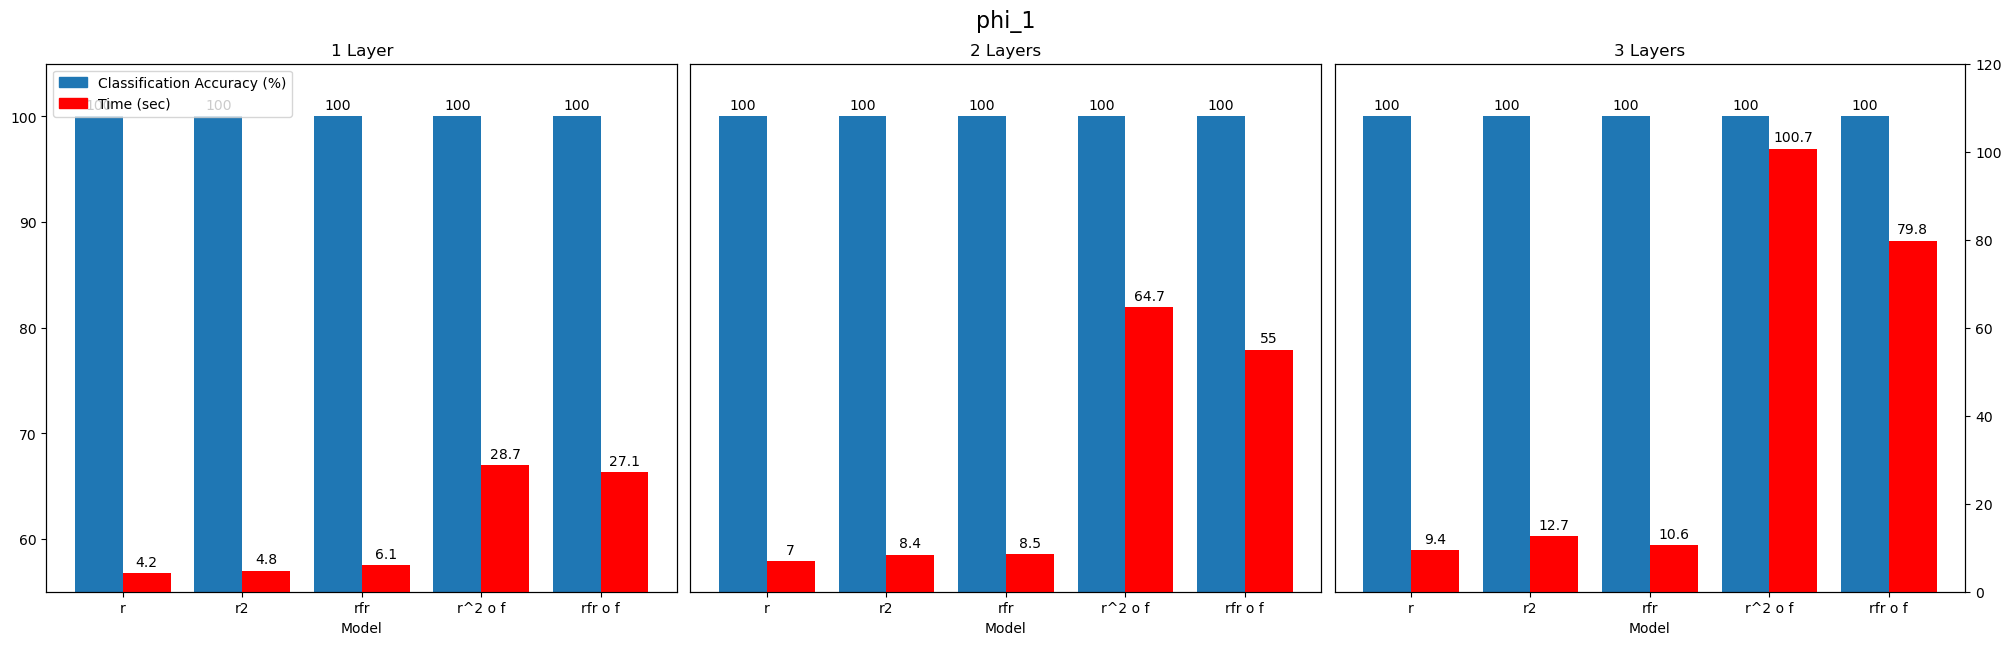

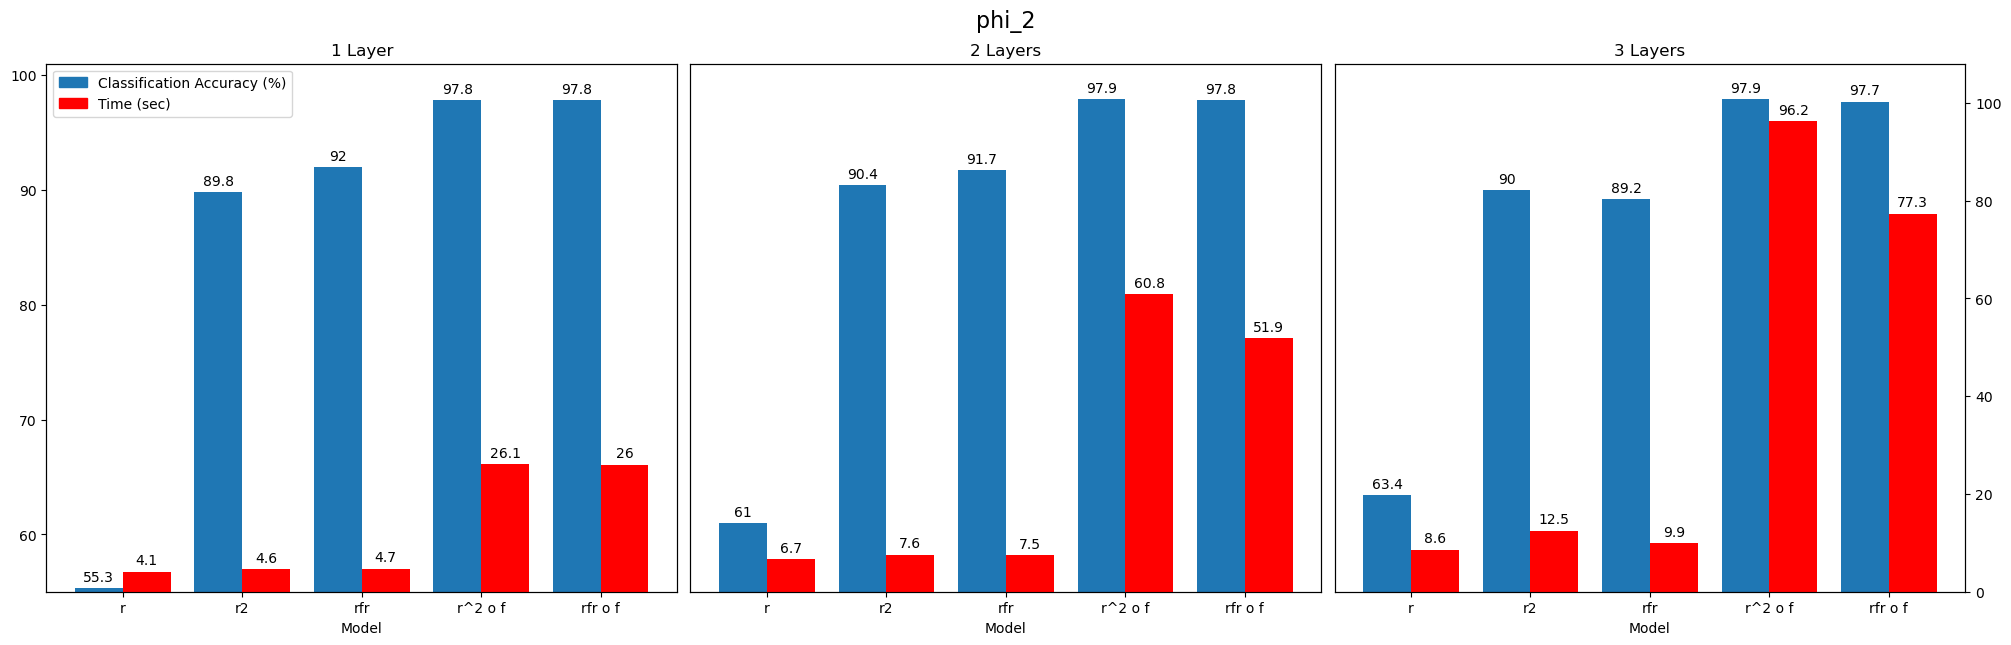

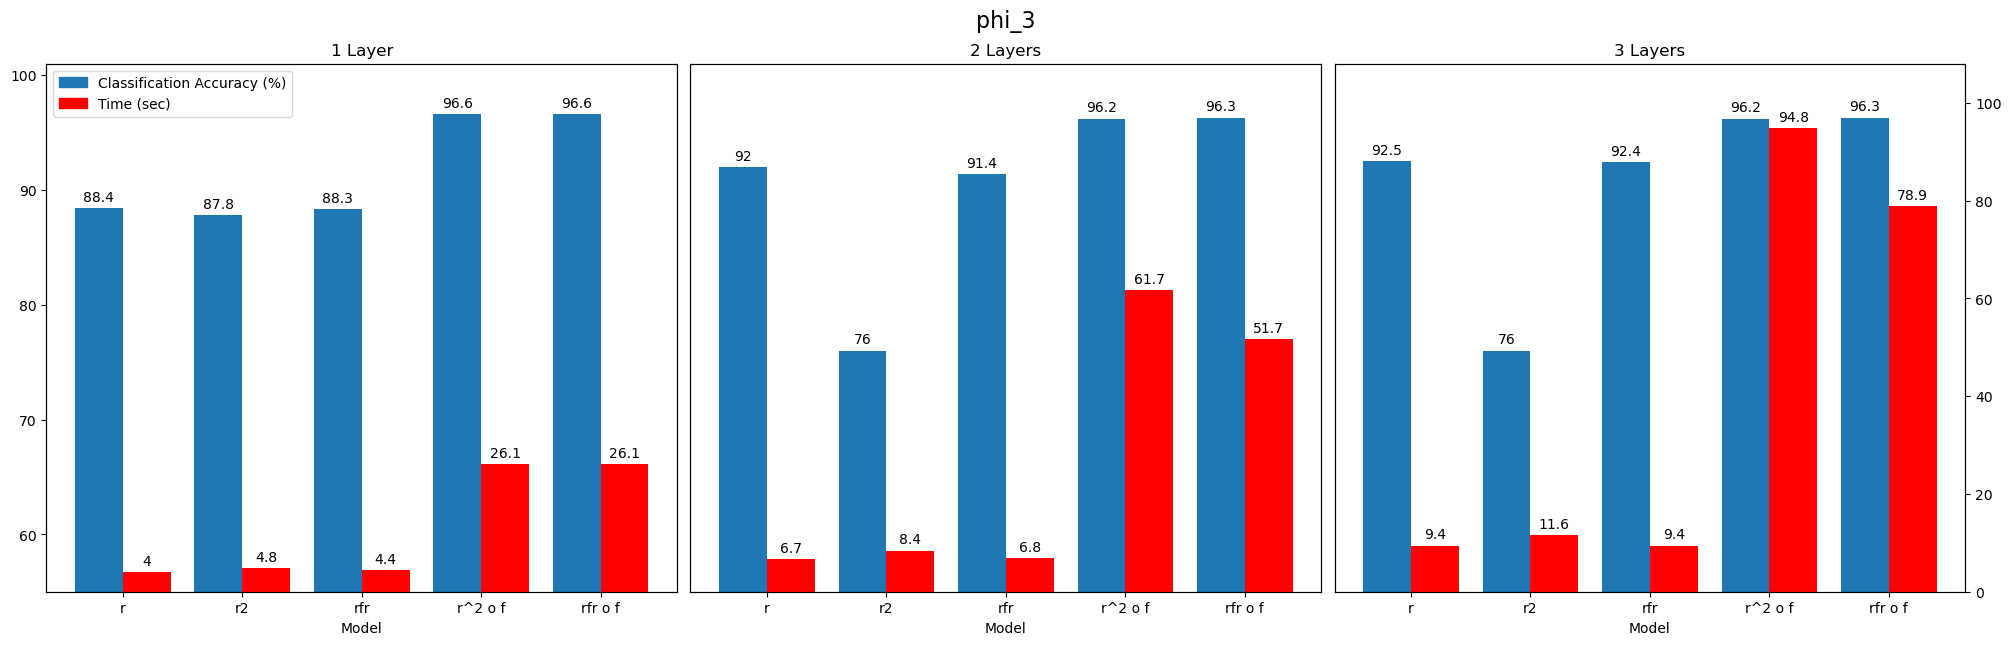

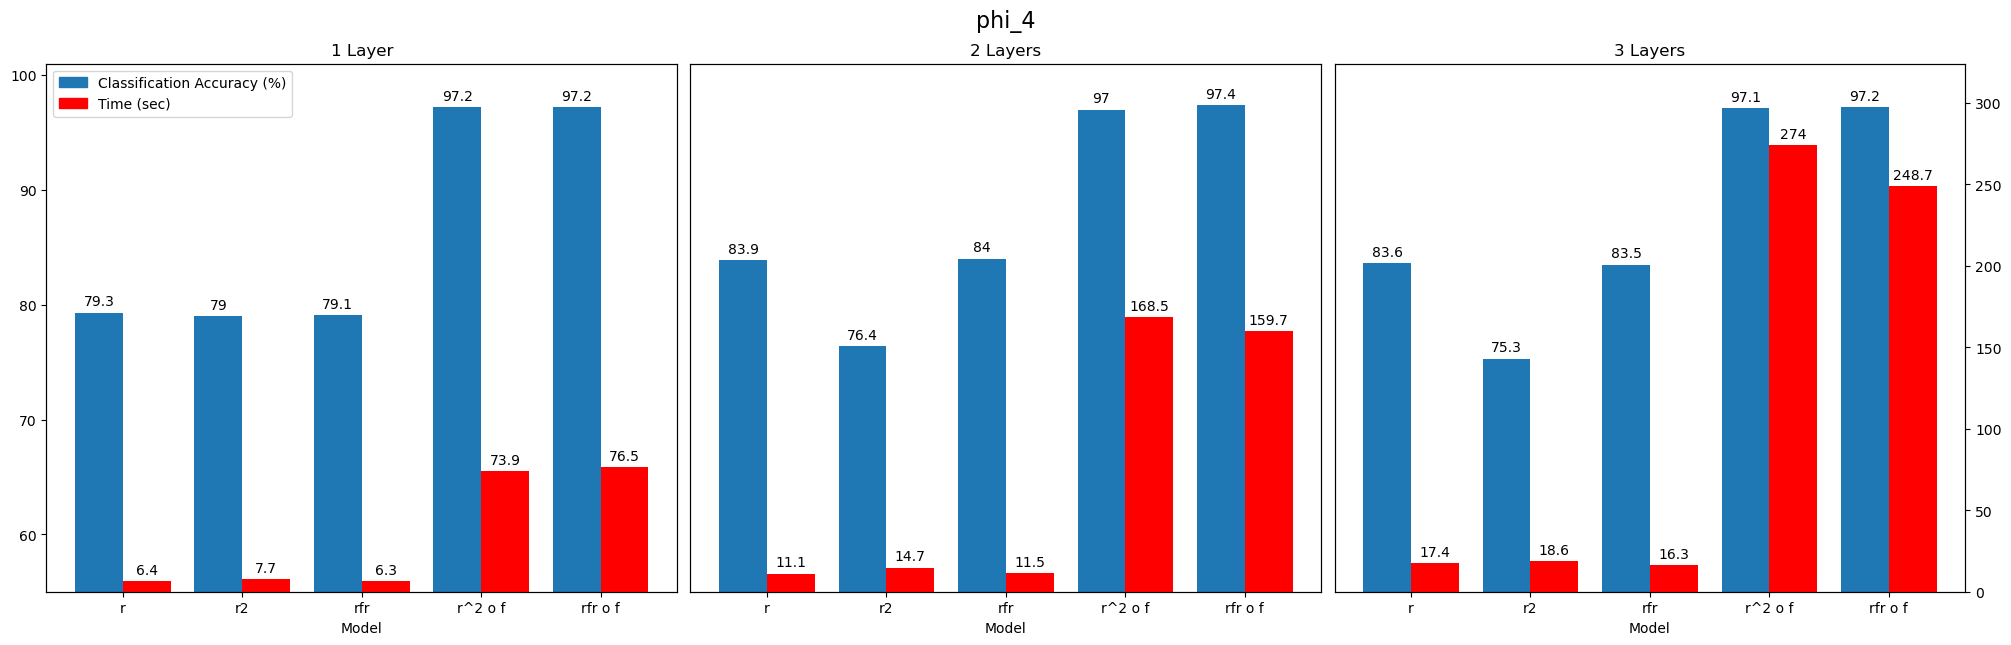

In [4]:
from matplotlib.patches import Patch

handles = [
    Patch(facecolor='C0', edgecolor='C0', label='Classification Accuracy (%)'),
    Patch(facecolor='red', edgecolor='r', label='Time (sec)')
]

for classifier in [1, 2, 3, 4]:
    fig, axs = plt.subplots(1, 3, constrained_layout=True)
    layers = [1, 2, 3]
    class_df = full_df.loc[full_df["classifier"] == f"phi_{classifier}"]
    max_acc = max(class_df["acc"])
    max_time = max(class_df["time"])
    print(max_acc, max_time)
    for l, ax in zip(layers, axs):
        df = class_df.loc[class_df["layers"] == l]

        inds = np.arange(len(df))
        width = .4

        accs = ax.bar(inds, df["acc"], width, label="Accuracy")
        ax.bar_label(accs, padding=3)

        axt = ax.twinx()
        times = axt.bar(inds + width, df["time"], width, label="Time", color="red")
        axt.bar_label(times, padding=3)

        ax.set_title(f'{l} Layer{"s" if l > 1 else ""}')
        ax.set_xticks(inds + width/2, df["model"])
        ax.set_xlabel('Model')
        # ax.set_ylabel("Accuracy (%)")
        ax.set_ylim(55, 101 if max_acc < 100 else 105)
        # axt.set_ylabel("Time (sec)")
        axt.set_ylim(0, ((max_time//(max_time//10))+2)*(max_time//10))
        if l == layers[0]:
            ax.legend(handles=handles, loc='upper left')
        if l != layers[0]:
            ax.set_yticks([])
            # ax.set_ylabel("")
        if l != layers[-1]:
            axt.set_yticks([])
            # axt.set_ylabel("")
            
    fig.set_size_inches(20, 6)
    fig.suptitle(f'phi_{classifier}', fontsize=16, y=1.05)
    fig.savefig(f"phi_{classifier}")